In [1]:
###################################################################
# Poker Project Assignment 1 by Pantourakis Michail
#
# All code blocks can be executed either serially or independently.
# Some data required for proper execution are automatically exported
# to .json files (e.g. state space files, pretrained models). 
# Note that the generated files are also provided for your convenience
# (e.g. further training/analysis, playing against agents).
###################################################################

from game import Game
import json
from env import Env
from random_agent import RandomAgent
from threshold_agent import ThresholdAgent
from policy_iteration_agent import PolicyIterationAgent
import time
start_time = time.time()

''' Calculate card probabilities which affect state transition probabilities for Policy Iteration's required state space
'''

[ win_probabilities, loss_probabilities, flop_probabilities, range_probabilities ] = Game.get_transition_probabilities_for_cards()

with open('flop_probabilities.json', 'w') as json_file:
    json.dump(flop_probabilities, json_file, indent=4)

with open('loss_probabilities.json', 'w') as json_file:
    json.dump(loss_probabilities, json_file, indent=4)

with open('win_probabilities.json', 'w') as json_file:
    json.dump(win_probabilities, json_file, indent=4)

with open('range_probabilities.json', 'w') as json_file:
    json.dump(range_probabilities, json_file, indent=4)

''' State space calculation for Policy Iteration vs Random and Threshold Agents
'''

env = Env()
random_agent = RandomAgent(env.np_random, True)
threshold_agent = ThresholdAgent(True)

state_space = threshold_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Threshold Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open('threshold_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

state_space = random_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Random Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open('random_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

''' Get optimal policies for Random and Threshold Agents using Policy Iteration
'''

print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent)

with open('random_agent_optimal_policy.json', "w") as write_file:
    json.dump(pi_random_agent.P_opt, write_file, indent=4, sort_keys=True)

with open('threshold_agent_optimal_policy.json', "w") as write_file:
    json.dump(pi_threshold_agent.P_opt, write_file, indent=4, sort_keys=True)

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Threshold Agent:
len(state_space) =  2075
len(state_space[]) =  4500
Random Agent:
len(state_space) =  1000
len(state_space[]) =  2230
Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Total time elapsed for code snippet:  60.9763925075531  seconds


In [2]:
''' Policy Iteration Algorithm vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy
start_time = time.time()

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent) # WARNING: This class loads state space files created by first block.
env.set_agents([
    pi_random_agent,
    random_agent,
])

num_of_games = 5*10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('pi_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running  1000000  games "Policy Iteration Agent vs Random Agent"...
Progress (%)
100.0                    
Average payoffs:   0.872923
Standard deviation:   2.1293734844012224
Stored results successfully!
Total time elapsed for code snippet:  206.99074578285217  seconds


In [3]:
''' Threshold Agent vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy
start_time = time.time()

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
threshold_agent = ThresholdAgent(False, agent_model_is_known = False)
env.set_agents([
    threshold_agent,
    random_agent,
])

num_of_games = 5*10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Threshold Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('threshold_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running  1000000  games "Threshold Agent vs Random Agent"...
Progress (%)
100.0                        
Average payoffs:   0.3096915
Standard deviation:   1.6435972514055108
Stored results successfully!
Total time elapsed for code snippet:  198.49346733093262  seconds


In [4]:
''' Policy Iteration Algorithm vs Threshold Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from threshold_agent import ThresholdAgent
import json
import time
start_time = time.time()

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False, agent_model_is_known = True)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent) # WARNING: This class loads state space files created by first block.
env.set_agents([
    pi_threshold_agent,
    threshold_agent,
])

num_of_games = 5*10**6
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run()
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", npy.mean(agent_payoffs))
print("Standard deviation:  ", npy.std(agent_payoffs))

with open('pi_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")
end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Running  1000000  games "Policy Iteration Agent vs Threshold Agent"...
Progress (%)
100.0                
Average payoffs:   0.222818
Standard deviation:   1.4664588773218294
Stored results successfully!
Total time elapsed for code snippet:  194.25632047653198  seconds


In [5]:
''' Training Q Learning Algorithm vs Threshold Agent & Analyzing Hyperparameters
'''

from env import Env
from q_learning_agent import QLearningAgent
from threshold_agent import ThresholdAgent
import json
import time
import numpy as npy


start_time = time.time()

initial_epsilon_values = [1.0, 1.0, 1.0, 1.0, 1.0]
initial_alpha_values = [0.1, 0.1, 1.0, 0.1, 0.1]
epsilon_decay_values = [-1/8, -1/8, -1/8, -1/16, -1/16]
alpha_decay_values = [-1/4, -1/8, -1/4, -1/4, -1/8]
hyperparam_set_name = ['q_base', 'q_slower_alpha', 'q_bigger_alpha', 'q_slower_epsilon', 'q_slower_decay']
test_average_payoffs = [0.0, 0.0, 0.0, 0.0, 0.0]
test_std_payoffs = [0.0, 0.0, 0.0, 0.0, 0.0]

with open('random_agent_state_space.json') as json_file:
    unknown_agent_state_space = json.load(json_file)

print("Tuning Q Learning algorithm for Threshold Agent...")
for hyp_ind in range(len(initial_alpha_values)):
    test_payoffs = []
    for rep_ind in range(5):
        # Make environment
        env = Env()
        threshold_agent = ThresholdAgent(False, agent_model_is_known = False)
        q_learning_agent = QLearningAgent(
            env.np_random, 
            False, 
            is_learning = True, 
            initial_epsilon = initial_epsilon_values[hyp_ind], 
            initial_alpha = initial_alpha_values[hyp_ind], 
            epsilon_decay = epsilon_decay_values[hyp_ind], 
            alpha_decay = alpha_decay_values[hyp_ind],
            state_space = unknown_agent_state_space
        )
        env.set_agents([
            q_learning_agent,
            threshold_agent,
        ])

        agent_payoffs = []
        num_of_games = 3*10**6
        print("Training session ", rep_ind, " for hyperparameter set: ", hyperparam_set_name[hyp_ind])
        print("Progress (%)")
        for i in range(num_of_games):
            print(round(i/num_of_games*100, 1),"\r", end="")

            trajectories, payoffs = env.run()
            agent_payoffs.append(payoffs[0])

        print("Storing instance...")

        with open(hyperparam_set_name[hyp_ind] + '_threshold_model' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

        with open(hyperparam_set_name[hyp_ind] + '_threshold_payoffs_train' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)


        q_learning_agent.is_learning = False
        
        agent_payoffs = []
        num_of_games = 10**6
        print("Testing session ", rep_ind, " for hyperparameter set: ", hyperparam_set_name[hyp_ind])
        print("Progress (%)")
        for i in range(num_of_games):
            print(round(i/num_of_games*100, 1),"\r", end="")

            trajectories, payoffs = env.run()
            agent_payoffs.append(payoffs[0])


        print("Storing instance...")

        test_payoffs.extend(agent_payoffs)

        with open(hyperparam_set_name[hyp_ind] + '_threshold_payoffs_test' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)
    
    print("Testing average payoffs for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", npy.mean(test_payoffs))
    print("Testing standard deviation for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", npy.std(test_payoffs))

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Tuning Q Learning algorithm for Threshold Agent...
Training session for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_high_varying :  0.1118015
Testing standard deviation for hyperparameter set  q_high_varying :  0.9594963129672515
Training session for hyperparameter set:  q_faster_alpha
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_faster_alpha
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_faster_alpha :  -0.141848
Testing standard deviation for hyperparameter set  q_faster_alpha :  1.910035639692621
Training session for hyperparameter set:  q_low_epsilon
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_low_epsilon
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_low_epsilon :  0

In [6]:
''' Training Q Learning Algorithm vs Random Agent & Analyzing Hyperparameters
'''

from env import Env
from q_learning_agent import QLearningAgent
from random_agent import RandomAgent
import json
import time
import numpy as npy


start_time = time.time()

initial_epsilon_values = [1.0, 1.0, 1.0, 1.0, 1.0]
initial_alpha_values = [1.0, 1.0, 0.1, 1.0, 0.1]
epsilon_decay_values = [-1/8, -1/4, -1/8, -1/16, -1/16]
alpha_decay_values = [-1/4, -1/8, -1/4, -1/4, -1/8]
hyperparam_set_name = ['q_base', 'q_slower_alpha', 'q_lower_alpha', 'q_slower_epsilon', 'q_slower_decay']
test_average_payoffs = [0.0, 0.0, 0.0, 0.0]
test_std_payoffs = [0.0, 0.0, 0.0, 0.0]

with open('random_agent_state_space.json') as json_file:
    unknown_agent_state_space = json.load(json_file)

## File that includes optimal policy for Random Agent by Policy Iteration algorithm, created by first code block
print("Loading Optimal Policy for Random Agent...")
with open('random_agent_optimal_policy.json') as json_file:
    random_optimal_policy = json.load(json_file)

print("Tuning Q Learning algorithm for Random Agent...")
for hyp_ind in range(len(initial_alpha_values)):
    test_payoffs = []
    for rep_ind in range(5):
        # Make environment
        env = Env()
        random_agent = RandomAgent(env.np_random, False)
        q_learning_agent = QLearningAgent(
            env.np_random, 
            False, 
            is_learning = True, 
            initial_epsilon = initial_epsilon_values[hyp_ind], 
            initial_alpha = initial_alpha_values[hyp_ind], 
            epsilon_decay = epsilon_decay_values[hyp_ind], 
            alpha_decay = alpha_decay_values[hyp_ind],
            state_space = unknown_agent_state_space
        )
        env.set_agents([
            q_learning_agent,
            random_agent,
        ])

        agent_payoffs = []
        num_of_games = 3*10**6
        q_policy_evolution = []
        print("Training session ", rep_ind, " for hyperparameter set: ", hyperparam_set_name[hyp_ind])
        print("Progress (%)")
        for i in range(num_of_games):
            print(round(i/num_of_games*100, 1),"\r", end="")
            trajectories, payoffs = env.run()
            agent_payoffs.append(payoffs[0])
            counter = 0
            for state_key in q_learning_agent.model['policy']:
                if q_learning_agent.model['policy'][state_key] == random_optimal_policy[state_key]:
                    counter += 1
            q_policy_evolution.append(round(100*counter/len(random_optimal_policy), 2))

        print("Storing instance...")

        with open(hyperparam_set_name[hyp_ind] + '_random_model' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

        with open(hyperparam_set_name[hyp_ind] + '_random_payoffs_train' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

        with open(hyperparam_set_name[hyp_ind] + '_random_policy_evolution' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(q_policy_evolution, json_file, indent=4, sort_keys=True)


        q_learning_agent.is_learning = False
        
        agent_payoffs = []
        num_of_games = 10**6
        print("Testing session ", rep_ind, " for hyperparameter set: ", hyperparam_set_name[hyp_ind])
        print("Progress (%)")
        for i in range(num_of_games):
            print(round(i/num_of_games*100, 1),"\r", end="")

            trajectories, payoffs = env.run()
            agent_payoffs.append(payoffs[0])


        print("Storing instance...")

        test_payoffs.extend(agent_payoffs)

        with open(hyperparam_set_name[hyp_ind] + '_random_payoffs_test' + str(rep_ind) + '.json', 'w') as json_file:
            json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)
    
    print("Testing average payoffs for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", npy.mean(test_payoffs))
    print("Testing standard deviation for hyperparameter set ", hyperparam_set_name[hyp_ind], ": ", npy.std(test_payoffs))

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Loading Optimal Policy for Random Agent...
Tuning Q Learning algorithm for Random Agent...
Training session for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_high_varying
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_high_varying :  0.8272625
Testing standard deviation for hyperparameter set  q_high_varying :  2.007299929281559
Training session for hyperparameter set:  q_slower_alpha
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_slower_alpha
Progress (%)
Storing instance...
Testing average payoffs for hyperparameter set  q_slower_alpha :  0.5124025
Testing standard deviation for hyperparameter set  q_slower_alpha :  1.678829332598686
Training session for hyperparameter set:  q_slower_epsilon
Progress (%)
Storing instance...
Testing session number for hyperparameter set:  q_slower_epsilon
Progress (%)
Storing instance...
Testing average payof

In [8]:
###########################################################
# Figure Utilities
###########################################################

import matplotlib.pyplot as plt
from utils import get_moving_average
import json
import os
from IPython import display
import time
start_time = time.time()

SAVE_FIGURES = True # save figures for latex
DISPLAY_FIGURES = True # display figures in notebook
saved_figures = []

class Figure:
    def __init__(self, title, xlabel, ylabel, x, ys, legends, filename):
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for y in ys:
            plt.plot(x,y)
        plt.legend(legends, loc = "best", frameon = False)
        self.filename = filename
        self.save_figure_or_continue()
    def save_figure_or_continue(self):
        plt.show
        if DISPLAY_FIGURES: 
            plt.savefig(self.filename + ".png", bbox_inches = "tight")
            saved_figures.append(self.filename + ".png")
        if SAVE_FIGURES: plt.savefig("../latex/figures/" + self.filename + ".png", bbox_inches = "tight")
        plt.close()

def display_figures():
    """ A utility to display saved figures inside this notebook
    """
    filelist=os.listdir()
    for file in saved_figures:
        display.display(display.Image(file))

def delete_figures():
    """ A utility to delete saved figures
    """
    for file in saved_figures:
        os.remove(file)

###########################################################
# Figure generation
###########################################################


hyperparam_set_name = ['q_base', 'q_slower_alpha', 'q_lower_alpha', 'q_slower_epsilon', 'q_slower_decay']

policy_evolution = []
for name in hyperparam_set_name:
    with open(name+'_random_policy_evolution0.json') as json_file:
        policy_evolution.append(json.load(json_file))
    
num_of_games = len(policy_evolution[0]) # <---- num_of_games of blocks above should be the same for all experiments in order for this code to finish figures successfully

Figure(
    title = "Q Learning Policy Convergence Rate vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Same policy per state (%)",
    x = range(1,num_of_games+1),
    ys = policy_evolution,
    legends = hyperparam_set_name,
    filename = "convergence_rate"
)

window_size = 10**5  # <---- CHANGE WINDOW SIZE HERE

print("Calculating q_random_moving_averages...")

moving_average_payoffs = []
for name in hyperparam_set_name:
    with open(name+'_random_payoffs_train0.json') as json_file:
        moving_average_payoffs.append(get_moving_average(json.load(json_file), window_size))

with open('pi_random_payoffs.json') as json_file:
    pi_random_payoffs = json.load(json_file)

random_optimal_mean = sum(pi_random_payoffs)/len(pi_random_payoffs)

legends = hyperparam_set_name[:]
legends.append('mean optimal')

moving_average_payoffs.append([random_optimal_mean]*len(moving_average_payoffs[0]))

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(moving_average_payoffs[0])+window_size),
    ys = moving_average_payoffs,
    legends = legends,
    filename = "moving_averages_random"
)

hyperparam_set_name = ['q_base', 'q_slower_alpha', 'q_bigger_alpha', 'q_slower_epsilon', 'q_slower_decay']

print("Calculating q_threshold_moving_averages...")

moving_average_payoffs = []
for name in hyperparam_set_name:
    with open(name+'_threshold_payoffs_train0.json') as json_file:
        moving_average_payoffs.append(get_moving_average(json.load(json_file), window_size))

window_size = 10**5  # <---- CHANGE WINDOW SIZE HERE

with open('pi_threshold_payoffs.json') as json_file:
    pi_threshold_payoffs = json.load(json_file)

threshold_optimal_mean = sum(pi_threshold_payoffs)/len(pi_threshold_payoffs)

legends = hyperparam_set_name[:]
legends.append('mean optimal')

moving_average_payoffs.append([threshold_optimal_mean]*len(moving_average_payoffs[0]))

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Threshold Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(moving_average_payoffs[0])+window_size),
    ys = moving_average_payoffs,
    legends = legends,
    filename = "moving_averages_threshold"
)

end_time = time.time()
print("Total time elapsed for code snippet: ",  end_time - start_time, " seconds")

Calculating q_threshold_moving_averages...
Total time elapsed for code snippet:  80.84345960617065  seconds


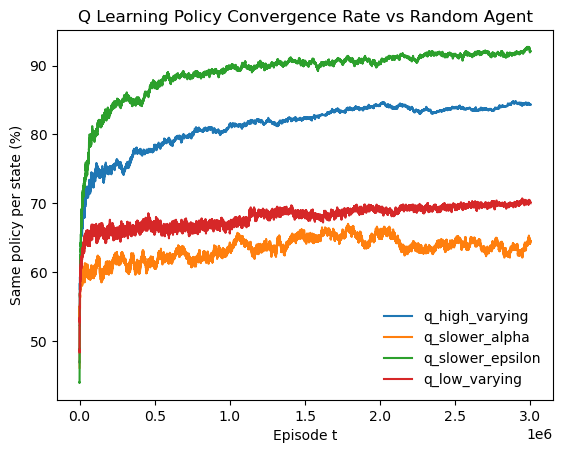

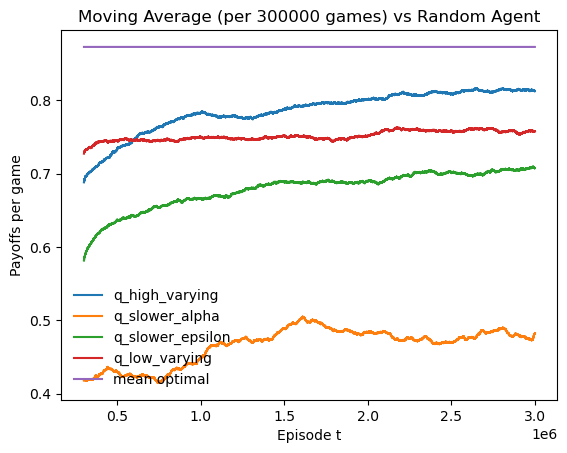

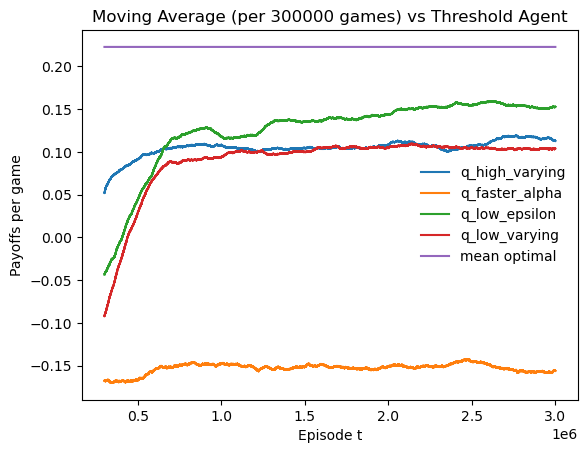

In [2]:
###########################################################
# Load generated figures & clean folder
###########################################################

if DISPLAY_FIGURES: 
    display_figures()
    delete_figures()